In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [156]:
df=pd.read_csv('weatherHistory.csv')

In [157]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [97]:
df.shape

(96453, 12)

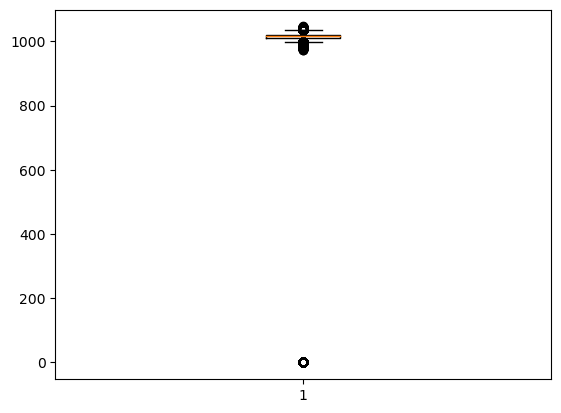

In [98]:
# plt.boxplot(df['Pressure (millibars)'])
# plt.show()

In [99]:
df_new=df.drop(columns=['Formatted Date','Loud Cover'])
df_new.shape

(96453, 10)

In [100]:
df.shape

(96453, 12)

In [101]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   96453 non-null  object 
 1   Precip Type               95936 non-null  object 
 2   Temperature (C)           96453 non-null  float64
 3   Apparent Temperature (C)  96453 non-null  float64
 4   Humidity                  96453 non-null  float64
 5   Wind Speed (km/h)         96453 non-null  float64
 6   Wind Bearing (degrees)    96453 non-null  float64
 7   Visibility (km)           96453 non-null  float64
 8   Pressure (millibars)      96453 non-null  float64
 9   Daily Summary             96453 non-null  object 
dtypes: float64(7), object(3)
memory usage: 7.4+ MB


In [102]:
df_new.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,1046.380000


In [103]:
# df_new['Loud Cover'].unique()

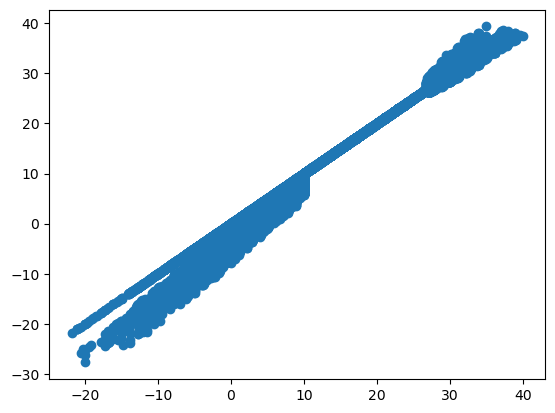

In [104]:
plt.scatter(df_new['Temperature (C)'],df_new['Apparent Temperature (C)'])
plt.show()

### After plotting every feature with label I came to conclusion that the Apparent Temperature(label) depends linearly only on Temperature(feature).

In [105]:
x=df_new['Temperature (C)']
y=df_new['Apparent Temperature (C)']

In [106]:
x.shape

(96453,)

In [107]:
y.shape

(96453,)

In [108]:
# x=

In [109]:
from sklearn.model_selection import train_test_split


In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [112]:
# x_train.ndim
x_train=x_train.values.reshape(-1,1)
# x_train.shape
x_train.shape

(77162, 1)

In [114]:
# y_train.ndim
y_train=y_train.values.reshape(-1,1)
y_train.shape

(77162, 1)

In [121]:
x_test=x_test.reshape(-1,1)
x_test.shape

(19291, 1)

In [122]:
y_test.shape

(19291,)

### Applying Linear Regression

In [123]:
from sklearn.linear_model import LinearRegression


In [124]:
lr=LinearRegression()

In [125]:
lr.fit(x_train, y_train)

LinearRegression()

In [126]:
y_pred=lr.predict(x_test)

In [127]:
y_pred.shape

(19291, 1)

In [128]:
# pred=model.predict(xtest)
data=list(zip(y_test,y_pred))

In [129]:
comptab=pd.DataFrame(data,columns=['Actual','Predicted'])
comptab

,Actual,Predicted
0,14.422222,[13.62090695930991]
1,12.155556,[11.10044105119797]
2,23.961111,[24.22786765594765]
3,15.000000,[14.263378661377658]
4,12.800000,[11.817044103504305]
...,...,...
19286,28.255556,[29.707409961083172]
19287,17.216667,[16.728246056810658]
19288,-1.000000,[-3.5281453958830946]
19289,7.327778,[5.732095771420331]


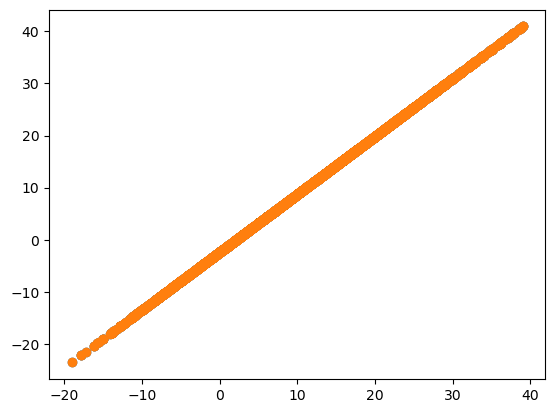

In [131]:
plt.scatter(x_test,y_pred)
plt.show()

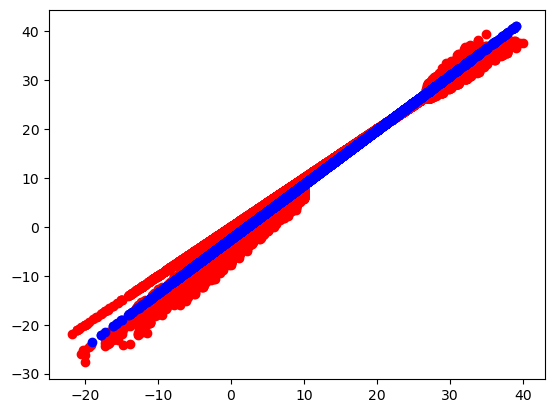

In [140]:
plt.scatter(x_train,y_train,color='red')
plt.scatter(x_test,y_pred,color='blue')
# plt.scatter(x_test,y_test)
plt.show()

### Applying Performance Metrics

In [144]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [145]:
mean_squared_error(y_test,y_pred)

1.6820729326083674

In [146]:
mean_absolute_error(y_test,y_pred)

0.9946153181403559

# Removing Outliers

### As in previous model we created model without removing Outliers.
### So in this following Model we try to remove all the outliers from the feature so that our Linear Regression Model Could predict well i.e., to increade accuracy 

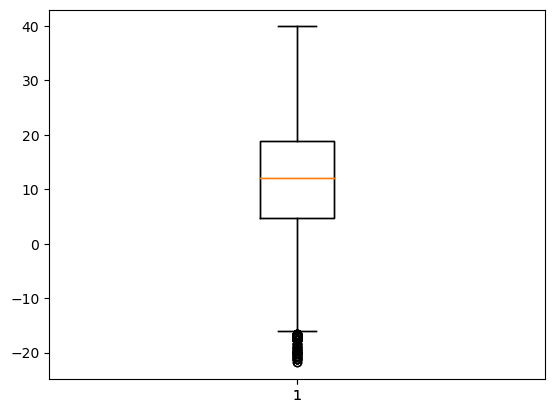

In [151]:
plt.boxplot(df['Temperature (C)'])
plt.show()

In [ ]:
# dfnew=df.drop(columns=[''])

In [152]:
from scipy.stats import iqr
# sns.boxplot(df['price'])
q1=df['Temperature (C)'].quantile(0.25)
q3=df['Temperature (C)'].quantile(0.75)
inter_qr=iqr(df['Temperature (C)'])
print(q1)
print(q3)
print(inter_qr)

4.688888888888887
18.83888888888889
14.150000000000002


In [161]:
df_new['Outliers']=0
df_new['Outliers']=np.where(df_new['Temperature (C)']>q3+1.5*inter_qr,1,df_new['Outliers'])
df_new['Outliers']=np.where(df_new['Temperature (C)']<q1-1.5*inter_qr,1,df_new['Outliers'])
df_new.head(35)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary,Outliers
0,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.,0
1,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.,0
2,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.,0
3,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.,0
4,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.,0
5,Partly Cloudy,rain,9.222222,7.111111,0.85,13.9587,258.0,14.9569,1016.66,Partly cloudy throughout the day.,0
6,Partly Cloudy,rain,7.733333,5.522222,0.95,12.3648,259.0,9.9820,1016.72,Partly cloudy throughout the day.,0
7,Partly Cloudy,rain,8.772222,6.527778,0.89,14.1519,260.0,9.9820,1016.84,Partly cloudy throughout the day.,0
8,Partly Cloudy,rain,10.822222,10.822222,0.82,11.3183,259.0,9.9820,1017.37,Partly cloudy throughout the day.,0
9,Partly Cloudy,rain,13.772222,13.772222,0.72,12.5258,279.0,9.9820,1017.22,Partly cloudy throughout the day.,0


Removing Row whose Outliers value is 1 

In [162]:
dfclean=df_new[df_new['Outliers']==0]
dfclean.shape

(96409, 11)

In [163]:
df_new.shape

(96453, 11)

In [164]:
x=dfclean['Temperature (C)']
y=dfclean['Apparent Temperature (C)']

In [173]:
x=x.reshape(-1,1)
x.shape

(96409, 1)

In [175]:
y=y.reshape(-1,1)
y.shape

(96409, 1)

### Splitting our Dataset

In [177]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=0)

In [178]:
print(xtrain.shape)
print(xtest.shape)
print(ytest.shape)
print(ytrain.shape)

(77127, 1)
(19282, 1)
(19282, 1)
(77127, 1)


### Applying Linear Regression

In [179]:
from sklearn.linear_model import LinearRegression

In [180]:
lr=LinearRegression()

In [181]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [182]:
ypred=lr.predict(xtest)

In [193]:
ypred.shape

(19282, 1)

In [199]:
pd.DataFrame({'x Test':xtest.reshape(19282,),'y Test':ytest.reshape(19282,),'y Predicted':ypred.reshape(19282,)})

,x Test,y Test,y Predicted
0,7.194444,3.372222,5.584814
1,3.661111,0.905556,1.655569
2,8.605556,6.738889,7.154041
3,10.038889,10.038889,8.747980
4,5.116667,2.677778,3.274220
...,...,...,...
19277,2.844444,-0.244444,0.747394
19278,8.450000,6.594444,6.981056
19279,-0.027778,-4.138889,-2.446662
19280,16.061111,16.061111,15.444996


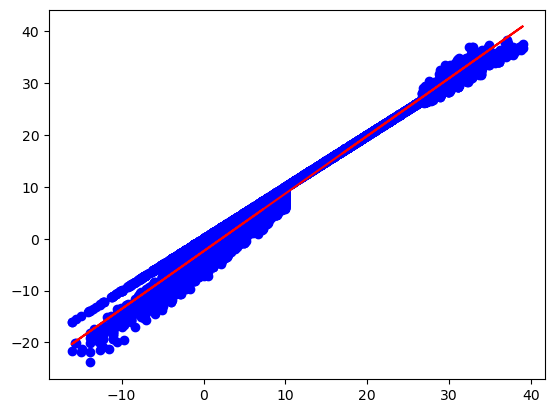

In [203]:
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ypred,color='red')
plt.show()

### Applying Performance Metrics

In [204]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [205]:
mean_absolute_error(ytest,ypred)

0.9930812572855974

In [206]:
mean_squared_error(ytest,ypred)

1.6850196928746723

### Comparing both performance metrics

In [218]:
mean_absolute_error(ytest,ypred)==mean_absolute_error(y_test,y_pred) 

False

In [219]:
mean_absolute_error(y_test,y_pred)-mean_absolute_error(ytest,ypred) # The diffrence is almost negligible

0.00153406085475849

In [220]:
mean_squared_error(ytest,ypred)==mean_squared_error(y_test,y_pred) 

False

In [221]:
mean_squared_error(ytest,ypred)-mean_squared_error(y_test,y_pred) # The diffrence is almost negligible

0.0029467602663049153

### After creating model and Comparing the performance metrics of both the model I came to conclusion that we can use any of the model as the Performance metrics of both of the models are same.
### I think this is because the numbers of outlier rows removed is almost negligible compared to the total rows in the dataset.